In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [119]:
data = pd.read_csv('green_tech_data.csv')

In [120]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [121]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [122]:
data.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [123]:
data['sustainability'].value_counts()


sustainability
0    85
1    15
Name: count, dtype: int64

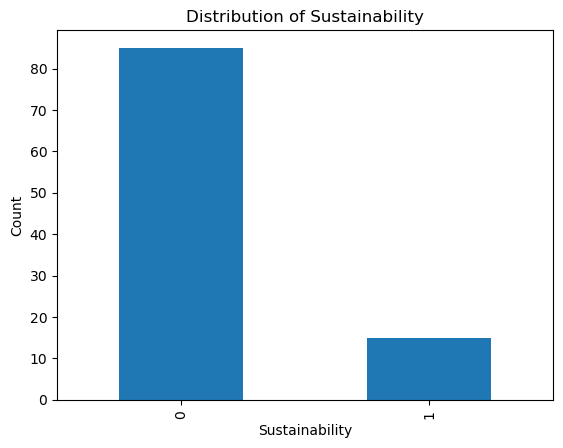

In [124]:
# Bar plot for sustainability distribution
data['sustainability'].value_counts().plot(kind='bar')
plt.title('Distribution of Sustainability')
plt.xlabel('Sustainability')
plt.ylabel('Count')
plt.show()


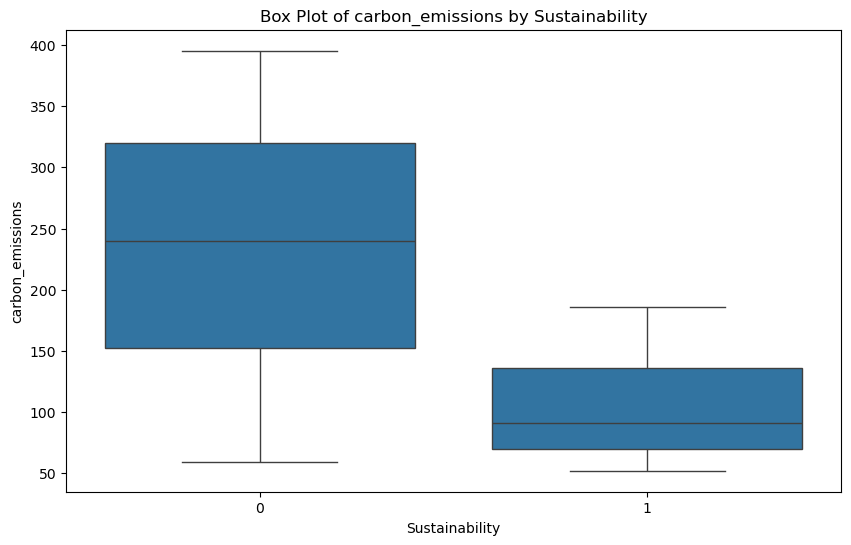

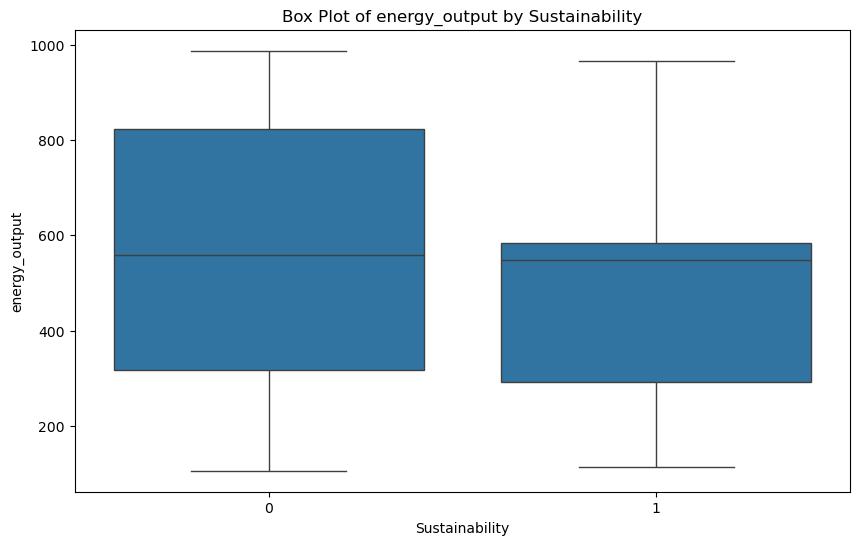

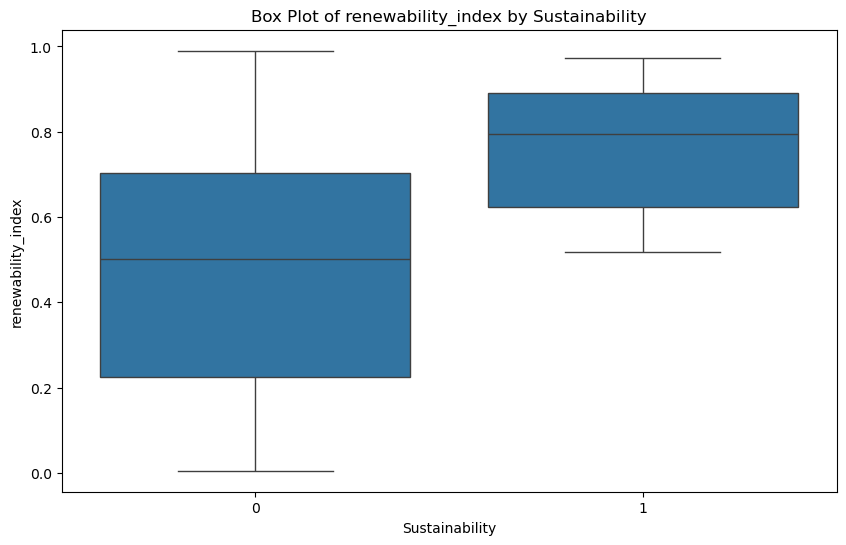

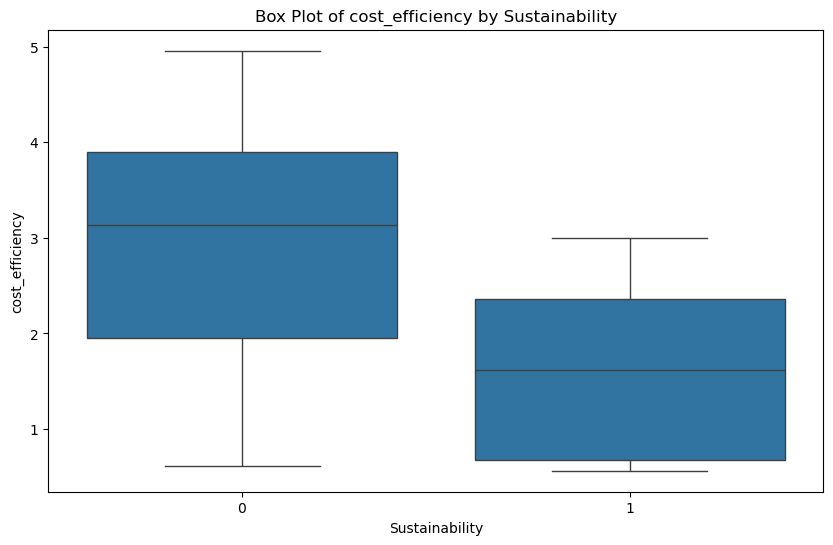

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features
features = ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']

# Create a box plot for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='sustainability', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Sustainability')
    plt.xlabel('Sustainability')
    plt.ylabel(feature)
    plt.show()


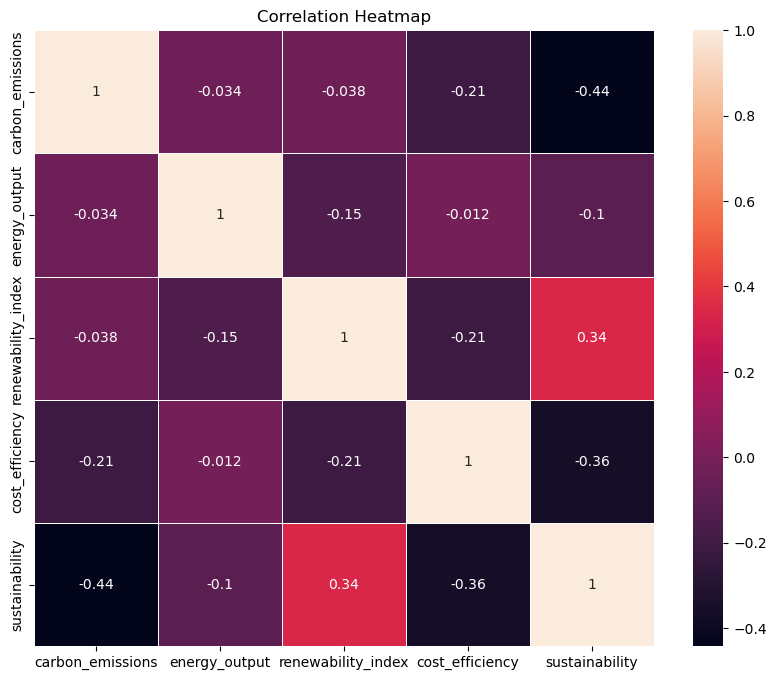

In [126]:
# Calculate the correlation matrix
dat = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dat, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [127]:
X=data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y=data['sustainability']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [130]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
print(y_train.unique())

[0 1]


In [132]:
threshold = 0.5  # Set your threshold value
y_train = (y_train > threshold).astype(int)


In [133]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [134]:
# Accuracy Score
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.95


In [135]:
print(y_test.unique())


[0 1]


In [136]:
threshold = 0.5  # Set your threshold value
y_test = (y_test > threshold).astype(int)


In [137]:
y_pred = model.predict(X_test)


In [138]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.95


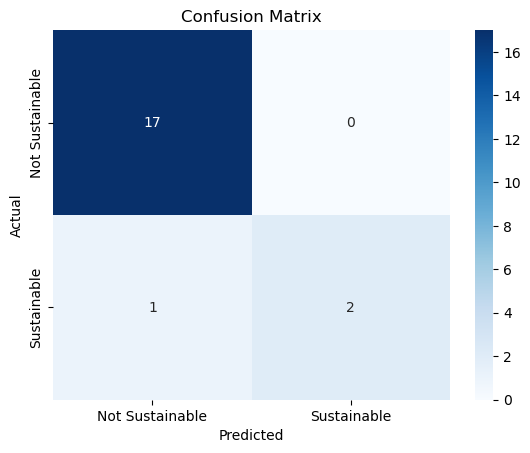

In [139]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable', 'Sustainable'],
            yticklabels=['Not Sustainable', 'Sustainable'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [140]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable'], labels=[0, 1]))


                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [141]:
#Feature importance
coefficients = pd.DataFrame(model.coef_.T, index = X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [142]:
import joblib
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [146]:
# Example data for prediction with the correct number of features
new_data = data.iloc[0, :model.n_features_in_].values.reshape(1, -1)


In [148]:
# Make predictions
predictions = model.predict(new_data)

# Print the predictions
print('Predicted Sustainability: ', predictions)


Predicted Sustainability:  [1]


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
